### This is a complete, end-to-end data processing flow for the external annotation for MOSE(Multimodal Online Student Engagement) project.



> **End-to-end:** From **Crowd-sourcing platform downloaded CSV** to **Packaged annotation for training**



> There are 5 main steps:
  1. Basic Data Cleaning
  2. Filtering and Validation Check
  3. Visualization
  4. Align with Video Data
  5. Packaging for Training

# **Library Prep**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from math import pi
import matplotlib.pyplot as plt
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import export_png
import altair as alt


In [ ]:
!pip install pingouin

In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# **Import Data, Basic Cleaning**

1. Rid unnecessary columns
2. Turn descriptive into numeric

In [3]:
# Data Import
# Load dataset into df and drop contributor info
df = pd.read_csv("/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /all_annotations.csv") # TBA
df.dropna(axis=1, how='all')

df = df.drop(df.columns[list(range(0,7))], axis=1)
df = df.drop(df.columns[list(range(1,5))], axis=1)
title = df.pop("video_title")
df.insert(0, "video_title", title)
df

,video_title,_worker_id,does_the_professor_bottom_left_video_seem_engaging,so_what_is_the_main_context_of_the_video,the_student_top_video_looks_confused,the_student_top_video_seems_bored_during_the_lecture,the_student_top_video_seems_engaged_in_the_lecture,the_student_top_video_seems_focused_in_the_lecture,the_student_top_video_seems_interested_in_the_lecture,what_is_the_main_context_of_the_video_check_all_that_apply,does_the_professor_bottom_left_video_seem_engaging_gold,so_what_is_the_main_context_of_the_video_gold,the_student_top_video_looks_confused_gold,the_student_top_video_seems_bored_during_the_lecture_gold,the_student_top_video_seems_engaged_in_the_lecture_gold,the_student_top_video_seems_focused_in_the_lecture_gold,the_student_top_video_seems_interested_in_the_lecture_gold,video_url,what_is_the_main_context_of_the_video_check_all_that_apply_gold
0,06082021_Catherine_1_PengHailu_11.mp4,46557597,no_nonenergeticboring_doesnt_use_gestures_when...,NaN,3,1,2,2,2,_professor_is_asking_a_question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
1,06082021_Catherine_1_PengHailu_11.mp4,45598105,no_nonenergeticboring_doesnt_use_gestures_when...,NaN,1,2,3,4,4,professor_is_showing_a_video_of_someone_else_e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
2,06082021_Catherine_1_PengHailu_11.mp4,46676154,yes_energetic_joyful_uses_hand_gestures_when_e...,NaN,1,1,5,5,5,_professor_is_sharing_a_funny_video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
3,06082021_Catherine_1_PengHailu_11.mp4,45589503,no_nonenergeticboring_doesnt_use_gestures_when...,NaN,1,3,1,3,3,professor_is_readingexplaining_off_slides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
4,06082021_Catherine_1_PengHailu_11.mp4,46379093,no_nonenergeticboring_doesnt_use_gestures_when...,NaN,2,4,4,4,3,professor_is_showing_a_video_of_someone_else_e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164906,07082021_Nigel_5_HantingXu_29.mp4,47129417,yes_energetic_joyful_uses_hand_gestures_when_e...,NaN,3,3,4,3,3,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164907,07082021_Nigel_5_HantingXu_29.mp4,47017190,yes_energetic_joyful_uses_hand_gestures_when_e...,NaN,3,4,4,4,4,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164908,07082021_Nigel_5_HantingXu_29.mp4,46175095,no_nonenergeticboring_doesnt_use_gestures_when...,amusing,3,5,4,2,2,professor_is_writing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164909,07082021_Nigel_5_HantingXu_29.mp4,46378674,yes_energetic_joyful_uses_hand_gestures_when_e...,NaN,1,5,1,4,5,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN


In [ ]:
# clean prof engagement data - No = 0, Yes = 1
def professor_engagement(row):
  if row['does_the_professor_bottom_left_video_seem_engaging']== 'no_nonenergeticboring_doesnt_use_gestures_when_explaining_monotonic_voice_tone_etc_':
    return 0
  else:
    return 1
df['does_the_professor_bottom_left_video_seem_engaging'] = df.apply(lambda row: professor_engagement(row), axis =1)
df

,video_title,_worker_id,does_the_professor_bottom_left_video_seem_engaging,so_what_is_the_main_context_of_the_video,the_student_top_video_looks_confused,the_student_top_video_seems_bored_during_the_lecture,the_student_top_video_seems_engaged_in_the_lecture,the_student_top_video_seems_focused_in_the_lecture,the_student_top_video_seems_interested_in_the_lecture,what_is_the_main_context_of_the_video_check_all_that_apply,does_the_professor_bottom_left_video_seem_engaging_gold,so_what_is_the_main_context_of_the_video_gold,the_student_top_video_looks_confused_gold,the_student_top_video_seems_bored_during_the_lecture_gold,the_student_top_video_seems_engaged_in_the_lecture_gold,the_student_top_video_seems_focused_in_the_lecture_gold,the_student_top_video_seems_interested_in_the_lecture_gold,video_url,what_is_the_main_context_of_the_video_check_all_that_apply_gold
0,06082021_Catherine_1_PengHailu_11.mp4,46557597,0,NaN,3,1,2,2,2,_professor_is_asking_a_question,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
1,06082021_Catherine_1_PengHailu_11.mp4,45598105,0,NaN,1,2,3,4,4,professor_is_showing_a_video_of_someone_else_e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
2,06082021_Catherine_1_PengHailu_11.mp4,46676154,1,NaN,1,1,5,5,5,_professor_is_sharing_a_funny_video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
3,06082021_Catherine_1_PengHailu_11.mp4,45589503,0,NaN,1,3,1,3,3,professor_is_readingexplaining_off_slides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
4,06082021_Catherine_1_PengHailu_11.mp4,46379093,0,NaN,2,4,4,4,3,professor_is_showing_a_video_of_someone_else_e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164906,07082021_Nigel_5_HantingXu_29.mp4,47129417,1,NaN,3,3,4,3,3,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164907,07082021_Nigel_5_HantingXu_29.mp4,47017190,1,NaN,3,4,4,4,4,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164908,07082021_Nigel_5_HantingXu_29.mp4,46175095,0,amusing,3,5,4,2,2,professor_is_writing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN
164909,07082021_Nigel_5_HantingXu_29.mp4,46378674,1,NaN,1,5,1,4,5,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1tOTK-tsRPgXML...,NaN


In [ ]:
df.rename(columns = {'does_the_professor_bottom_left_video_seem_engaging':'professor_engaging', 'so_what_is_the_main_context_of_the_video':'other_context','the_student_top_video_looks_confused':'confused', 'the_student_top_video_seems_bored_during_the_lecture':'bored', 'the_student_top_video_seems_engaged_in_the_lecture':'engaged', 'the_student_top_video_seems_focused_in_the_lecture':'focused','the_student_top_video_seems_interested_in_the_lecture':'interested', 'what_is_the_main_context_of_the_video_check_all_that_apply':'context'}, inplace = True)
df = df[df.columns.drop(list(df.filter(regex='gold')))]
other = df.pop("other_context")
df.insert(8, "other_context", other)
df.head()

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,other_context,context,video_url
0,06082021_Catherine_1_PengHailu_11.mp4,46557597,0,3,1,2,2,2,NaN,_professor_is_asking_a_question,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
1,06082021_Catherine_1_PengHailu_11.mp4,45598105,0,1,2,3,4,4,NaN,professor_is_showing_a_video_of_someone_else_e...,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
2,06082021_Catherine_1_PengHailu_11.mp4,46676154,1,1,1,5,5,5,NaN,_professor_is_sharing_a_funny_video,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
3,06082021_Catherine_1_PengHailu_11.mp4,45589503,0,1,3,1,3,3,NaN,professor_is_readingexplaining_off_slides,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
4,06082021_Catherine_1_PengHailu_11.mp4,46379093,0,2,4,4,4,3,NaN,professor_is_showing_a_video_of_someone_else_e...,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...


In [ ]:
# categorize context of video
def context(row):
  row_title = row['context']

  if row_title == 'professor_is_writing':
    return 0
  elif row_title == 'professor_is_showing_a_video_of_someone_else_explaining_a_topic':
    return 1
  elif row_title == '_professor_is_sharing_a_funny_video':
    return 2
  elif row_title == 'professor_is_readingexplaining_off_slides':
    return 3
  elif row_title == '_professor_is_asking_a_question':
    return 4
  elif row_title == 'student_displayed_is_asking_a_question':
    return 5
  elif row_title == 'a_student_that_is_not_shown_in_the_video_recording_is_asking_a_question':
    return 6
  elif row_title == 'other':
    return 7

# df['context'] = df.apply(lambda row: context(row), axis =1)
df.loc[:, 'context'] = df.apply(lambda row: context(row), axis=1)
df.head()

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,other_context,context,video_url
0,06082021_Catherine_1_PengHailu_11.mp4,46557597,0,3,1,2,2,2,NaN,4.0,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
1,06082021_Catherine_1_PengHailu_11.mp4,45598105,0,1,2,3,4,4,NaN,1.0,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
2,06082021_Catherine_1_PengHailu_11.mp4,46676154,1,1,1,5,5,5,NaN,2.0,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
3,06082021_Catherine_1_PengHailu_11.mp4,45589503,0,1,3,1,3,3,NaN,3.0,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
4,06082021_Catherine_1_PengHailu_11.mp4,46379093,0,2,4,4,4,3,NaN,1.0,https://drive.google.com/file/d/1BXLXdCNLFH-Vr...


In [ ]:
df.describe()

,_worker_id,professor_engaging,confused,bored,engaged,focused,interested
count,1.649110e+05,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.00000
mean,4.659447e+07,0.813051,3.297421,3.018646,3.195063,3.228493,3.10989
std,4.360494e+05,0.389872,1.416253,1.202804,1.345245,1.331717,1.20532
min,4.515571e+07,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,4.620000e+07,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000
50%,4.663870e+07,1.000000,3.000000,3.000000,3.000000,3.000000,3.00000
75%,4.698900e+07,1.000000,5.000000,4.000000,4.000000,4.000000,4.00000
max,4.727467e+07,1.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [ ]:
df = df.drop(columns = ['other_context','video_url'])

In [ ]:
# Each dataframe contains 10 annotations for a video, each object of the list is a dataframe.
grouped = df.groupby("video_title")
df_list = df_list = [grouped.get_group(x) for x in grouped.groups]
df_list[0]

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
134171,05082021_Catherine_1_Ammmy_1.mp4,46173120,1,4,4,4,5,4,7.0
134172,05082021_Catherine_1_Ammmy_1.mp4,46380325,1,3,3,5,5,3,7.0
134173,05082021_Catherine_1_Ammmy_1.mp4,46400290,1,4,3,4,5,3,7.0
134174,05082021_Catherine_1_Ammmy_1.mp4,46076183,1,5,4,3,3,4,7.0
134175,05082021_Catherine_1_Ammmy_1.mp4,46538326,1,5,4,4,4,4,7.0
134176,05082021_Catherine_1_Ammmy_1.mp4,46541371,1,3,4,3,5,3,7.0
134177,05082021_Catherine_1_Ammmy_1.mp4,47006994,1,5,2,3,1,1,5.0
134178,05082021_Catherine_1_Ammmy_1.mp4,46389871,1,3,3,4,4,3,7.0
134179,05082021_Catherine_1_Ammmy_1.mp4,46379793,0,1,1,3,4,2,6.0
134180,05082021_Catherine_1_Ammmy_1.mp4,46394561,1,3,4,5,3,3,7.0


# Standard Deviation Before Filtering

In [ ]:
import matplotlib.pyplot as plt

def plot_std_distribution_per_df(df_list, emotions):
    """
    For each DataFrame in df_list, calculate the standard deviation of each emotion
    and plot a histogram of these standard deviations.

    Parameters:
    - df_list: List of DataFrames, each containing data for a specific video.
    - emotions: List of emotions to calculate the standard deviation for and plot.
    """
    std_values = {emotion: [] for emotion in emotions}

    # Calculate standard deviation for each emotion in each DataFrame
    for df in df_list:
        std = df[emotions].std()
        for emotion in emotions:
            std_values[emotion].append(std[emotion])

    # Plotting histograms of standard deviations for each emotion
    plt.figure(figsize=(15, 10))
    for i, emotion in enumerate(emotions, 1):
        plt.subplot(2, 3, i)
        plt.hist(std_values[emotion], bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Standard Deviation Distribution of {emotion}')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Standard deviation values for each emotion across videos:")
    for emotion, values in std_values.items():
        print(f"{emotion}: {values}")

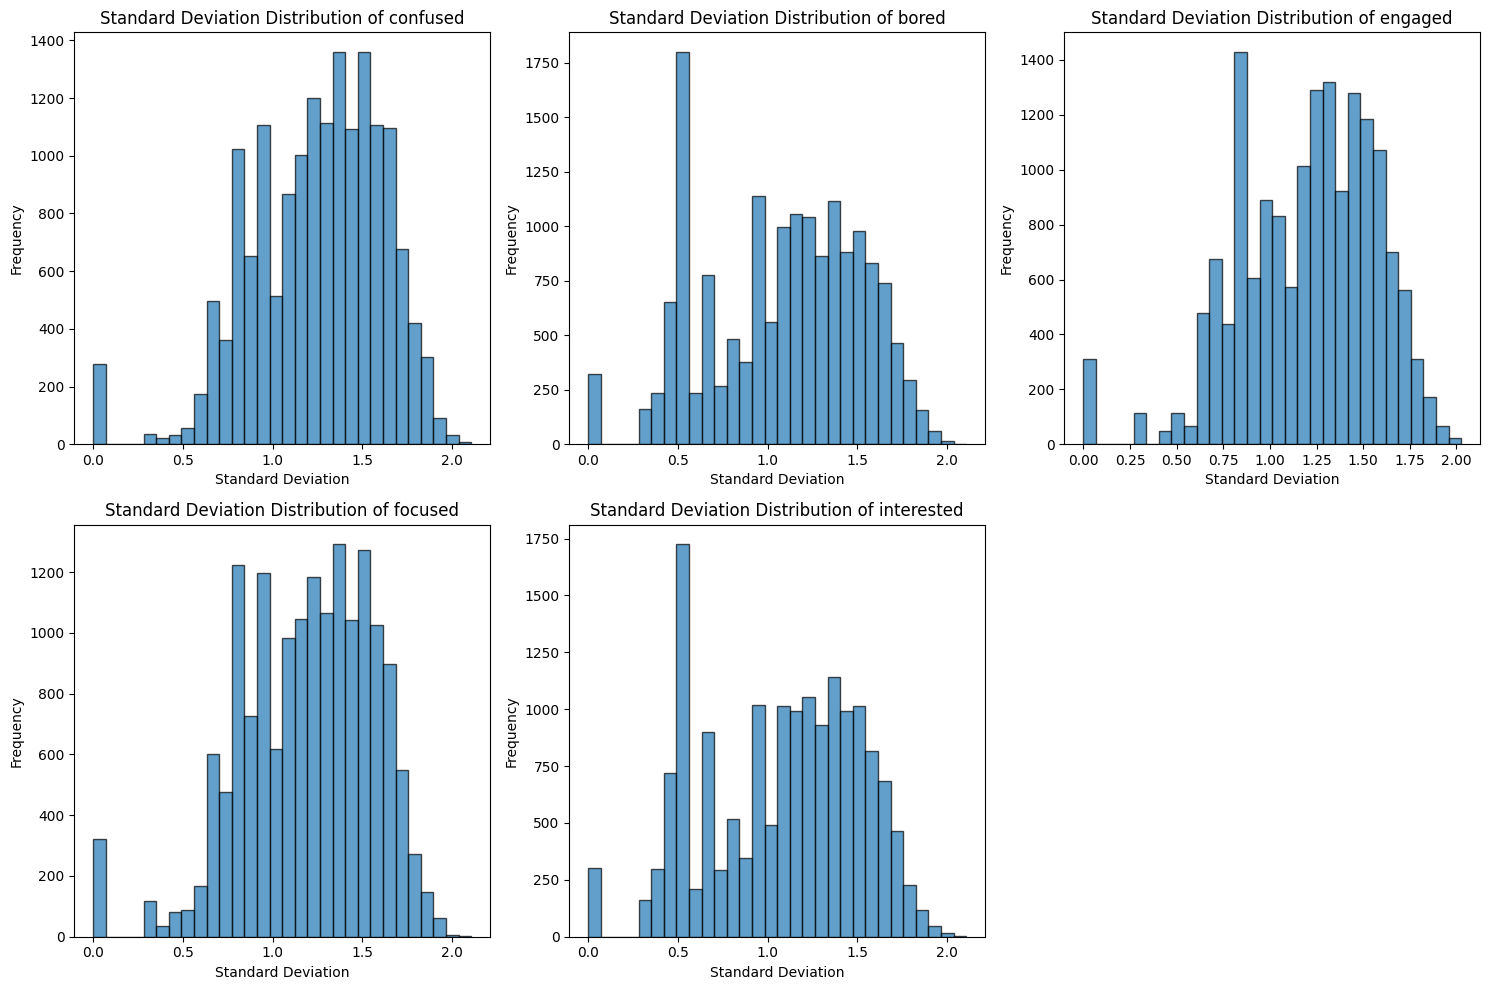

Standard deviation values for each emotion across videos:
confused: [1.2649110640673518, 1.3498971154211057, 0.9428090415820634, 1.247219128924647, 1.1972189997378646, 0.9189365834726814, 1.0801234497346432, 1.1737877907772671, 1.3984117975602022, 1.4907119849998598, 0.0, 1.577621275493231, 1.4181364924121764, 1.3165611772087666, 0.9428090415820634, 1.4298407059684812, 0.8755950357709131, 0.816496580927726, 0.7378647873726218, 0.9486832980505137, 1.1595018087284057, 1.5811388300841898, 1.1972189997378648, 1.751190071541826, 1.5776212754932308, 1.3333333333333333, 1.8257418583505536, 1.0327955589886444, 1.4757295747452437, 1.7511900715418263, 1.1972189997378646, 1.3333333333333333, 0.9486832980505138, 0.3162277660168379, 1.35400640077266, 1.0593499054713802, 1.0593499054713802, 0.0, 1.5951314818673865, 0.9660917830792959, 1.3165611772087666, 0.9428090415820634, 0.9189365834726815, 1.577621275493231, 1.5055453054181622, 1.8885620632287057, 1.505545305418162, 1.1595018087284057, 1.1972189

In [ ]:
emotions = ['confused', 'bored', 'engaged', 'focused', 'interested']
plot_std_distribution_per_df(df_list, emotions)

# **Filtering**



> ICC is recognized for assessing agreement among multiple raters by evaluating the correlation between their responses for the same data. In this study, ICC was utilized to assess the agreement among the 10 annotators for each attribute of engagement individually.



> Taking ICC as a reference, we filter annotations to improve reliability with least data waste.



Steps:

> 1. Rid unnecessary columns
2. Turn descriptive into numeric values
3. Pre-filtering Reliability Test
  - Calculate ICC for each attribute
  - Report ICC in combined format
4. Perform filtering
  - Create a list of dataframes for the 10 annotations for each video
  - Dropping rows where:
    - Context does not align with the majority (mode)
    - Professor Engagement does not align with the majority (mode)
    - Has Same value everywhere (for all the engagement related columns)
    - Too much difference from other responses
      - bored (mode)
      - engage(mean)
      - focus (mean)
      - interest (mean)
      - confuse (mean)
5. [Post-filtering Reliability Test](https://docs.google.com/presentation/d/1NmbPcXM0DskdIdPgvoV9EtQly0gS2Dc3cuxj3-cOFHU/edit#slide=id.g23e149a3139_1_42)

Check also the presentation for the reason behind dropping the rows.







### **Filtering**


In [ ]:
# Context
# df_list --> df_list_edit
df_list_edit = []
for i, df in enumerate(df_list):
    mode_context = df['context'].mode()[0]
    df_edit = df[df['context']==mode_context]
    df_list_edit.append(df_edit)

df_list_edit[0]

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
134171,05082021_Catherine_1_Ammmy_1.mp4,46173120,1,4,4,4,5,4,7.0
134172,05082021_Catherine_1_Ammmy_1.mp4,46380325,1,3,3,5,5,3,7.0
134173,05082021_Catherine_1_Ammmy_1.mp4,46400290,1,4,3,4,5,3,7.0
134174,05082021_Catherine_1_Ammmy_1.mp4,46076183,1,5,4,3,3,4,7.0
134175,05082021_Catherine_1_Ammmy_1.mp4,46538326,1,5,4,4,4,4,7.0
134176,05082021_Catherine_1_Ammmy_1.mp4,46541371,1,3,4,3,5,3,7.0
134178,05082021_Catherine_1_Ammmy_1.mp4,46389871,1,3,3,4,4,3,7.0
134180,05082021_Catherine_1_Ammmy_1.mp4,46394561,1,3,4,5,3,3,7.0


In [ ]:
# Prof_Engage
# df_list --> df_list_edit
df_list_edit2 = []
for i, df in enumerate(df_list_edit):
    mode_prof_engage = df['professor_engaging'].mode()[0]
    df_edit = df[df['professor_engaging']==mode_prof_engage]
    df_list_edit2.append(df_edit)

df_list_edit2[0]

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
134171,05082021_Catherine_1_Ammmy_1.mp4,46173120,1,4,4,4,5,4,7.0
134172,05082021_Catherine_1_Ammmy_1.mp4,46380325,1,3,3,5,5,3,7.0
134173,05082021_Catherine_1_Ammmy_1.mp4,46400290,1,4,3,4,5,3,7.0
134174,05082021_Catherine_1_Ammmy_1.mp4,46076183,1,5,4,3,3,4,7.0
134175,05082021_Catherine_1_Ammmy_1.mp4,46538326,1,5,4,4,4,4,7.0
134176,05082021_Catherine_1_Ammmy_1.mp4,46541371,1,3,4,3,5,3,7.0
134178,05082021_Catherine_1_Ammmy_1.mp4,46389871,1,3,3,4,4,3,7.0
134180,05082021_Catherine_1_Ammmy_1.mp4,46394561,1,3,4,5,3,3,7.0


In [ ]:
# Same Value Everywhere
# df_list --> df_list_edit
df_list_edit3 = []
for i, df in enumerate(df_list_edit2):
    df_edit = df.drop(df[(df['confused'] == df['bored']) &
                         (df['confused'] == df['engaged']) &
                         (df['confused'] == df['focused']) &
                         (df['confused'] == df['interested'])].index, inplace=False)
    df_list_edit3.append(df_edit)

df_list_edit3[0]


,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
134171,05082021_Catherine_1_Ammmy_1.mp4,46173120,1,4,4,4,5,4,7.0
134172,05082021_Catherine_1_Ammmy_1.mp4,46380325,1,3,3,5,5,3,7.0
134173,05082021_Catherine_1_Ammmy_1.mp4,46400290,1,4,3,4,5,3,7.0
134174,05082021_Catherine_1_Ammmy_1.mp4,46076183,1,5,4,3,3,4,7.0
134175,05082021_Catherine_1_Ammmy_1.mp4,46538326,1,5,4,4,4,4,7.0
134176,05082021_Catherine_1_Ammmy_1.mp4,46541371,1,3,4,3,5,3,7.0
134178,05082021_Catherine_1_Ammmy_1.mp4,46389871,1,3,3,4,4,3,7.0
134180,05082021_Catherine_1_Ammmy_1.mp4,46394561,1,3,4,5,3,3,7.0


In [ ]:
# Assume the list of dataframes is named 'df_list'
df_list_edit3half = []
for i, df in enumerate(df_list_edit3):
    if len(df) > 0:
        df_list_edit3half.append(df)


In [ ]:
# Too much difference from other Response
df_list_edit4 = []

for i, df in enumerate(df_list_edit3half):
    mode_bored = df['bored'].mode()[0]
    average_engage = df['engaged'].mean()
    average_focus = df['focused'].mean()
    average_interest = df['interested'].mean()
    average_confuse = df['confused'].mean()
    df_edit = df[df['bored']-mode_bored<1.5]
    df_edit = df_edit[mode_bored - df_edit['bored']<1.5]
    df_edit = df_edit[average_engage-df_edit['engaged']<2.5]
    df_edit = df_edit[df_edit['engaged']-average_engage<2.5]
    df_edit = df_edit[average_focus-df_edit['focused']<2.5]
    df_edit = df_edit[df_edit['focused']-average_focus<2.5]
    df_edit = df_edit[average_interest-df_edit['interested']<2.5]
    df_edit = df_edit[df_edit['interested']-average_interest<2.5]
    df_edit = df_edit[average_confuse-df_edit['confused']<2.5]
    df_edit = df_edit[df_edit['confused']-average_confuse<2.5]

    df_list_edit4.append(df_edit)

df_list_edit4[4]

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
65151,05082021_Catherine_1_Ammmy_102.mp4,46361098,1,1,1,5,3,2,5.0
65157,05082021_Catherine_1_Ammmy_102.mp4,46191481,1,4,1,3,2,1,5.0


In [ ]:
df_list_edit4half = []
for i, df in enumerate(df_list_edit4):
    if len(df) > 0:
        df_list_edit4half.append(df)

len(df_list_edit4half)

16411

# Standard Deviation After Filtering

In [ ]:
import matplotlib.pyplot as plt

def plot_std_distribution_per_df(df_list, emotions):
    """
    For each DataFrame in df_list, calculate the standard deviation of each emotion
    and plot a histogram of these standard deviations.

    Parameters:
    - df_list: List of DataFrames, each containing data for a specific video.
    - emotions: List of emotions to calculate the standard deviation for and plot.
    """
    std_values = {emotion: [] for emotion in emotions}

    # Calculate standard deviation for each emotion in each DataFrame
    for df in df_list:
        std = df[emotions].std()
        for emotion in emotions:
            std_values[emotion].append(std[emotion])

    # Plotting histograms of standard deviations for each emotion
    plt.figure(figsize=(15, 10))
    for i, emotion in enumerate(emotions, 1):
        plt.subplot(2, 3, i)
        plt.hist(std_values[emotion], bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Standard Deviation Distribution of {emotion}')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Standard deviation values for each emotion across videos:")
    for emotion, values in std_values.items():
        print(f"{emotion}: {values}")

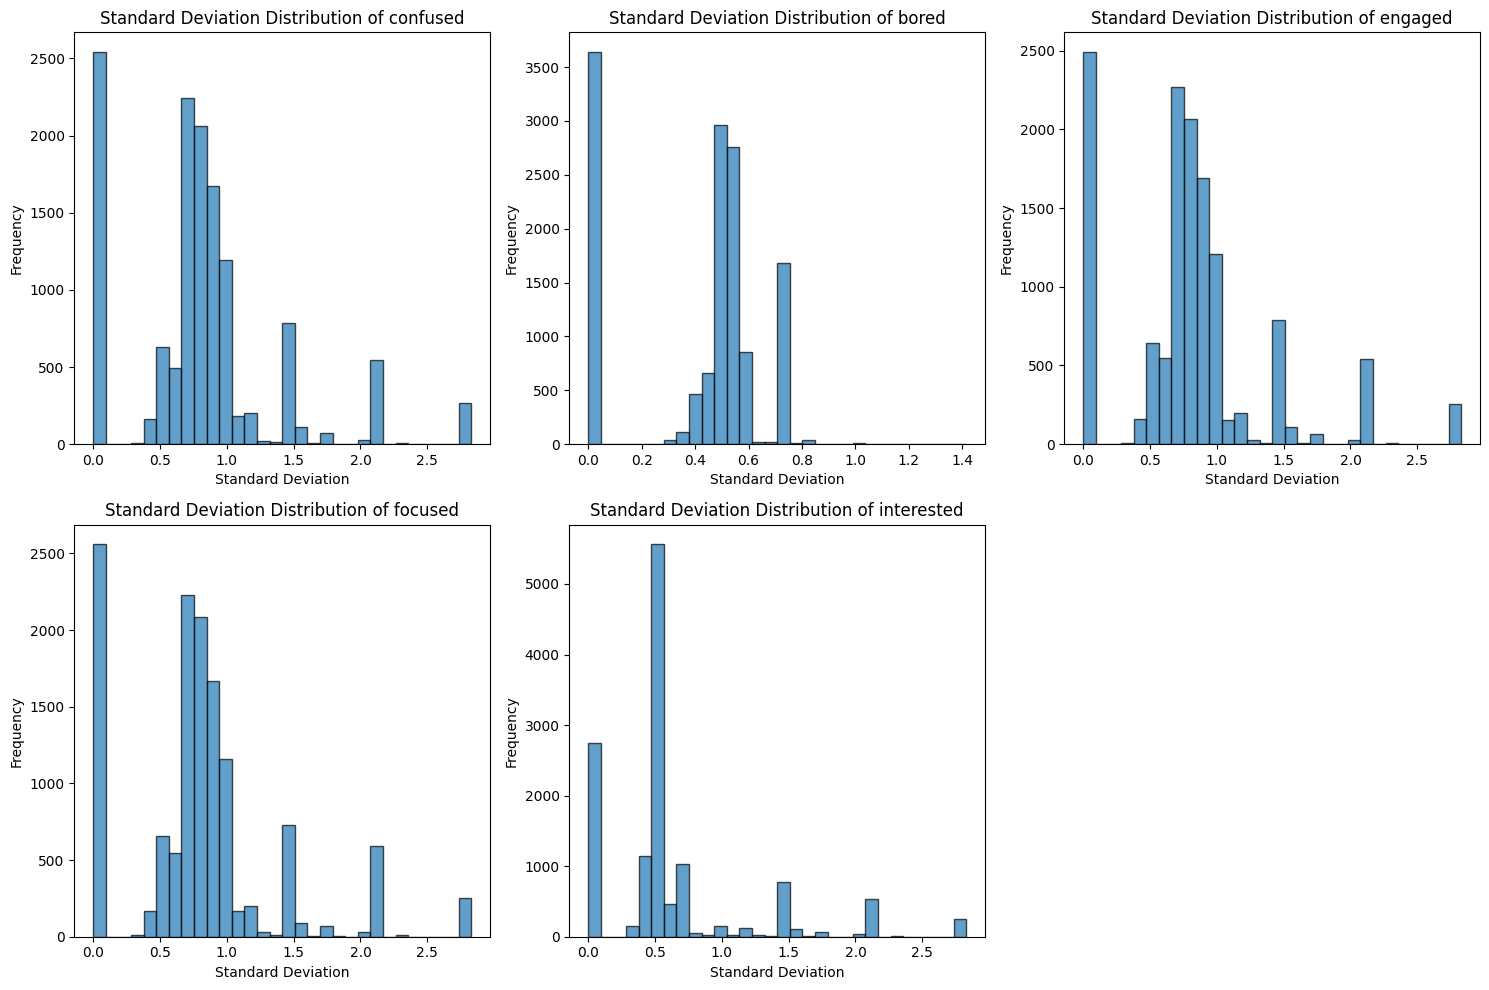

Standard deviation values for each emotion across videos:
confused: [0.8864052604279183, 1.4142135623730951, 1.0954451150103321, 0.6900655593423541, 2.1213203435596424, 0.9189365834726814, 0.6408699444616557, 0.7071067811865476, 0.7440238091428449, 0.6900655593423543, 0.0, 0.8997354108424372, 1.4142135623730951, 0.8997354108424372, 0.6666666666666667, nan, 0.8333333333333334, 0.816496580927726, 0.7378647873726218, 0.5175491695067657, 0.7559289460184544, 0.4472135954999579, 1.7320508075688772, 0.7071067811865476, 0.7071067811865476, 1.0, nan, 0.7071067811865476, nan, nan, nan, nan, 0.9486832980505138, 0.3333333333333333, 0.8997354108424372, 2.1213203435596424, nan, 0.0, 2.1213203435596424, 0.8345229603962802, 0.927960727138337, 0.9428090415820634, 0.9189365834726815, 0.8997354108424372, 1.4142135623730951, 0.0, 0.816496580927726, 0.0, 0.7440238091428449, nan, 2.1213203435596424, 0.5773502691896257, 0.9831920802501751, 0.7888106377466154, 0.0, 1.0, 0.8864052604279183, 0.7071067811865476,

In [ ]:
emotions = ['confused', 'bored', 'engaged', 'focused', 'interested']
plot_std_distribution_per_df(df_list_edit4half, emotions)

# Further Filtering

In [ ]:
# Initialize a new list to store filtered DataFrames
filtered_df_list = []

# Iterate over each DataFrame in df_list_edit4half
for df in df_list_edit4half:
    # Calculate the standard deviation for each specified emotion
    std = df[emotions].std()

    # Check if all standard deviations are less than or equal to 1.75
    if all(std[emotion] <= 1.75 for emotion in emotions):
        filtered_df_list.append(df)

# Display the number of DataFrames retained after filtering
print(f"Number of DataFrames after filtering: {len(filtered_df_list)}")


Number of DataFrames after filtering: 10920


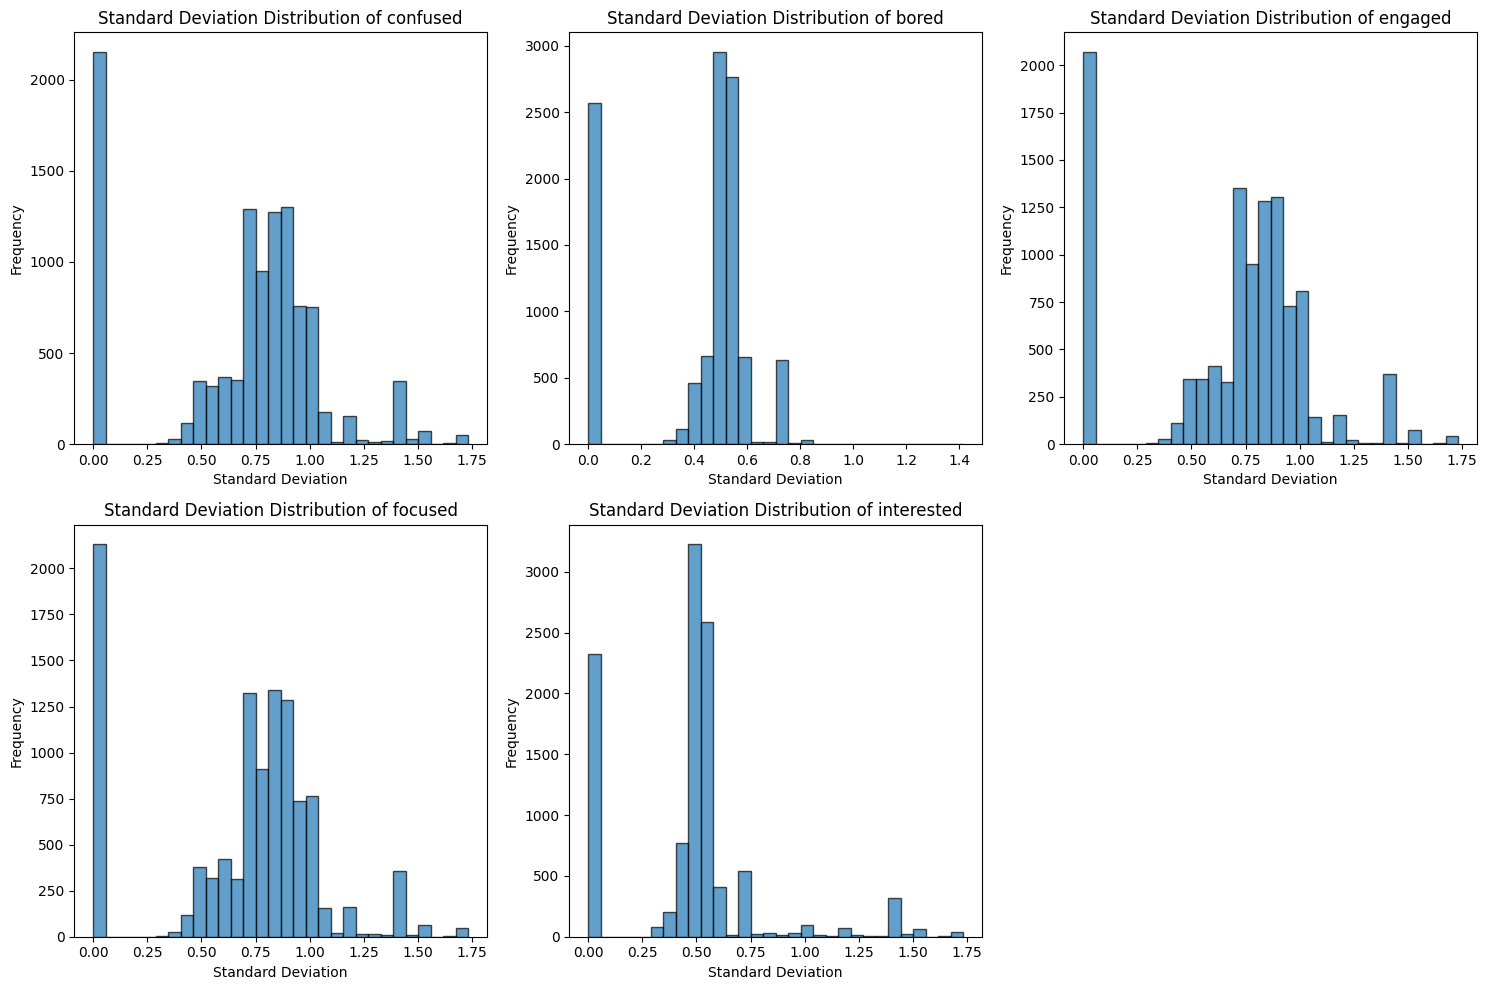

Standard deviation values for each emotion across videos:
confused: [0.8864052604279183, 1.0954451150103321, 0.6900655593423541, 0.9189365834726814, 0.6408699444616557, 0.7440238091428449, 0.6900655593423543, 0.0, 0.8997354108424372, 1.4142135623730951, 0.8997354108424372, 0.6666666666666667, 0.8333333333333334, 0.816496580927726, 0.7378647873726218, 0.5175491695067657, 0.7559289460184544, 0.4472135954999579, 0.7071067811865476, 1.0, 0.9486832980505138, 0.3333333333333333, 0.8997354108424372, 0.0, 0.8345229603962802, 0.927960727138337, 0.9428090415820634, 0.9189365834726815, 0.8997354108424372, 0.0, 0.816496580927726, 0.0, 0.7440238091428449, 0.5773502691896257, 0.9831920802501751, 0.7888106377466154, 1.0, 0.8864052604279183, 0.9511897312113418, 0.0, 0.7071067811865476, 0.816496580927726, 0.8997354108424372, 0.7071067811865476, 1.1547005383792517, 0.8997354108424372, 0.5, 0.7817359599705717, 0.927960727138337, 0.7378647873726218, 1.0327955589886446, 0.5477225575051661, 0.0, 1.516575088

In [ ]:
plot_std_distribution_per_df(filtered_df_list, emotions)

### **Combined the Attributes for a single Engagement Score**

In [ ]:
# Return the filtered dataframe list into a big dataframe, groupby, and then take mean by Video, to aggregate for a single Engagement score

# df_list_edit4half is the dataframe list

df_profil = pd.concat(filtered_df_list, ignore_index=True)
df_profil

,video_title,_worker_id,professor_engaging,confused,bored,engaged,focused,interested,context
0,05082021_Catherine_1_Ammmy_1.mp4,46173120,1,4,4,4,5,4,7.0
1,05082021_Catherine_1_Ammmy_1.mp4,46380325,1,3,3,5,5,3,7.0
2,05082021_Catherine_1_Ammmy_1.mp4,46400290,1,4,3,4,5,3,7.0
3,05082021_Catherine_1_Ammmy_1.mp4,46076183,1,5,4,3,3,4,7.0
4,05082021_Catherine_1_Ammmy_1.mp4,46538326,1,5,4,4,4,4,7.0
...,...,...,...,...,...,...,...,...,...
71355,23092021_Pierre_9_Sophie_9.mp4,45634244,1,5,4,4,3,3,7.0
71356,23092021_Pierre_9_Sophie_9.mp4,46545083,1,5,4,4,4,3,7.0
71357,23092021_Pierre_9_Sophie_9.mp4,46107579,1,5,3,3,4,4,7.0
71358,23092021_Pierre_9_Sophie_9.mp4,47033514,1,5,4,4,3,4,7.0


In [ ]:
df_profil_single = df_profil.groupby(['video_title'], as_index = False).mean()
df_profil_single = df_profil_single.drop(columns=['_worker_id','context','professor_engaging'])
df_profil_single.describe()

# the values of negative attributes are original at this point

,confused,bored,engaged,focused,interested
count,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000
mean,3.933302,3.292434,3.643403,3.664155,3.461922
std,0.835968,0.616559,0.738957,0.725124,0.567884
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.714286,3.000000,3.000000,3.138393,3.333333
50%,4.000000,3.428571,3.857143,3.875000,3.500000
75%,4.333333,3.600000,4.125000,4.142857,3.750000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_randomized = df_profil_single.sample(frac=1, random_state=1)
df_randomized

,video_title,confused,bored,engaged,focused,interested
307,05082021_Catherine_1_Llu6_77.mp4,4.300000,3.600000,3.9,3.500000,3.400000
5018,17092021_Nigel_3_HananSalam_13.mp4,4.000000,3.600000,4.1,4.100000,3.800000
1735,06082021_Catherine_1_HongjinZhu_150.mp4,1.000000,1.000000,3.0,4.000000,1.000000
9446,23092021_Pierre_11_AhmedElsaid_2.mp4,3.600000,3.800000,4.6,3.600000,3.400000
6499,21092021_Catherine_2_Sneha_36.mp4,5.000000,3.000000,3.0,3.000000,4.000000
...,...,...,...,...,...,...
2895,07082021_Nigel_3_AlexZhaoyang_1.mp4,4.200000,3.400000,4.0,4.400000,3.800000
7813,23092021_2_Pierre_2_Khayla_58.mp4,3.800000,3.500000,3.8,3.800000,3.700000
905,05082021_Catherine_2_Llu6_2.mp4,4.250000,3.375000,4.0,3.625000,3.000000
5192,18102021_Catherine_2_Administrator_82.mp4,5.000000,3.000000,3.0,3.000000,4.000000


In [ ]:
import math
nums_sample = df_randomized.shape[0]
nums_test = math.floor(nums_sample*0.2)
nums_valid = nums_test
nums_train = nums_sample - nums_test*2

In [ ]:
df_train = df_randomized[:nums_train]
df_test = df_randomized[nums_train:nums_train + nums_test]
df_valid = df_randomized[nums_train + nums_test:nums_train + nums_test + nums_valid]

# Optional: Verify the shapes to ensure the split is correct
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")
print(f"Validation set shape: {df_valid.shape}")

Training set shape: (6552, 6)
Testing set shape: (2184, 6)
Validation set shape: (2184, 6)


In [ ]:
train_filename = df_train['video_title']
train_filename.shape

(6552,)

In [ ]:
test_filename = df_test['video_title']
test_filename.shape

(2184,)

In [ ]:
valid_filename = df_valid['video_title']
valid_filename.shape

(2184,)

### **Output the list for train, test, valid so as to move the corresponding video files from /archive to /scratch for training**

In [ ]:
# Assuming 'df' is your DataFrame
train_filename = df_train['video_title']
valid_filename = df_valid['video_title']
test_filename = df_test['video_title']


# Output to a text file
with open('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /train_filename.txt', 'w') as file:
    for title in train_filename:
        file.write(f"{title}\n")

with open('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /valid_filename.txt', 'w') as file:
    for title in valid_filename:
        file.write(f"{title}\n")

with open('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /test_filename.txt', 'w') as file:
    for title in test_filename:
        file.write(f"{title}\n")


In [ ]:
filename = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /test_filename.txt'

with open(filename, 'r') as file:
    line_count = sum(1 for line in file)

print(f"The file {filename} has {line_count} lines.")


The file /content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /test_filename.txt has 2184 lines.


### Output the CSV for the train, test, valid to form pkl

In [ ]:
df_train.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_train_3.csv', index=False)
df_test.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_test_3.csv', index=False)
df_valid.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_valid_3.csv', index = False)

In [ ]:
import json
import pickle

train_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_train_3.csv'
test_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_test_3.csv'
valid_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_valid_3.csv'

# read the CSV file
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)
df_valid = pd.read_csv(valid_csv)

In [ ]:
size = df_valid.shape[0]
size

2184

In [ ]:
def normalization(df):
  min_value = df.iloc[:, 1:].values.min()
  max_value = df.iloc[:, 1:].values.max()
  df_normalized = (df.iloc[:, 1:] - min_value) / (max_value - min_value)
  df_normalized = pd.concat([df.iloc[:, 0], df_normalized], axis=1)
  return df_normalized

In [ ]:
df_train_normalized  = normalization(df_train)
df_test_normalized = normalization(df_test)
df_valid_normalized = normalization(df_valid)

In [ ]:
size = df_valid.shape[0]
size

2184

In [ ]:
def populate_dic(df_normalized):
  result = {'openness': {}, 'conscientiousness': {}, 'extraversion': {}, 'agreeableness': {}, 'neuroticism': {}}
  for i, video_title in enumerate(df_normalized['video_title']):
    video_title = video_title.split('.')[0] + '.mp4' # extract the video title without the file extension
    result['openness'][video_title] = df_normalized.iloc[i, 1]
    result['conscientiousness'][video_title] = df_normalized.iloc[i, 2]
    result['extraversion'][video_title] = df_normalized.iloc[i, 3]
    result['agreeableness'][video_title] = df_normalized.iloc[i, 4]
    result['neuroticism'][video_title] = df_normalized.iloc[i, 5]
  return result

result_train = populate_dic(df_train_normalized)
result_valid = populate_dic(df_valid_normalized)
result_test = populate_dic(df_test_normalized)

In [ ]:
# Verify the dictionary

def get_dict_shape(d):
    # Number of keys in the dictionary
    num_keys = len(d)

    # Number of items associated with each key
    # We assume that the dictionary values are iterables (like lists, sets, or other dictionaries)
    key_lengths = {key: len(value) for key, value in d.items()}

    return num_keys, key_lengths

num_keys, key_lengths = get_dict_shape(result_valid)

print(f"Number of keys: {num_keys}")
print(f"Number of items associated with each key: {key_lengths}")

Number of keys: 5
Number of items associated with each key: {'openness': 2184, 'conscientiousness': 2184, 'extraversion': 2184, 'agreeableness': 2184, 'neuroticism': 2184}


In [ ]:
# save to JSON

def save_json(filename,result):

  # save the result dictionary to a JSON file
  with open(filename + '.json', 'w') as f:
      json.dump(result, f)

  # load the JSON file
  with open(filename + '.json', 'r') as f:
      result_dict = json.load(f)

  # save the result dictionary as a pickle file
  with open(filename +'.pkl', 'wb') as f:
      pickle.dump(result_dict, f)

  # download the pickle file
  from google.colab import files
  files.download(filename +'.pkl')

  return

In [ ]:
save_json('annotation_train_3',result_train)
save_json('annotation_test_3',result_test)
save_json('annotation_valid_3',result_valid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>